---
### 最优捕鱼策略
> 1996年国赛A题

最优化问题，决策变量为固定努力量 $k$，目标函数是年总捕捞量 $z$，约束条件为所谓“可持续捕捞”，即每年初渔场的种群数量不变，翻译成数学语言就是令差分方程的平衡解稳定

直接使用 minimize 无法求得可行解，故使用搜索算法求解。核心思想是把目标函数转化为关于 $k$ 的表达式，再利用遍历方法计算 $z$ 值与 $k$ 值之间的关系

In [1]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

#### 符号计算

In [2]:
a = sp.symbols('a', real=True)      # 月自然死亡率
k = sp.symbols('k', nonneg=True)    # 对4龄鱼的捕捞强度系数
k3 = 0.42*k                         # 对三龄鱼的捕捞强度系数
n = sp.symbols('n', nonneg=True)    # 产卵总量
b = sp.symbols('b', real=True)      # 卵孵化成活率
m = sp.symbols('m', nonneg=True)    # 4龄鱼平均产卵量
m3 = m / 2                          # 3龄鱼平均产卵量
w = sp.symbols('w1:5', nonneg=True) # 平均质量
x1, x2, x3, x4 = sp.symbols('x1:5', positive=True)    # 各龄鱼的数量

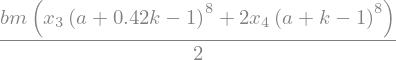

In [3]:
w3, w4 = w[2], w[3]
x21 = (1-a)**12*x1 
x31 = (1-a)**12*x2
z = np.sum([k3*(1-a-k3)**np.arange(8)*x3*w3]) + np.sum([k*(1-a-k)**np.arange(8)*x4*w4])
z = z.simplify()
n = m/2*(1-a-k3)**8*x3 + m*(1-a-k)**8*x4
x11 = b*n
x41 = (1-a-k3)**8*(1-a)**4*x3
x11.simplify()

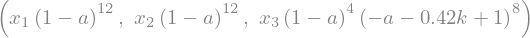

In [4]:
x21, x31, x41

In [5]:
x31 = x31.subs(x2, x21)
x31

In [6]:
x41 = x41.subs(x3, x31)
x41

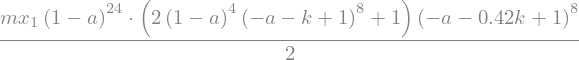

In [7]:
n = n.subs({x3: x31, x4: x41}).together()
n

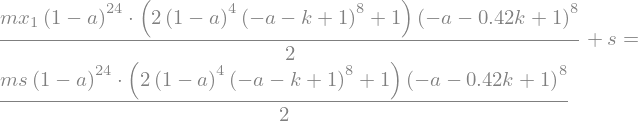

In [8]:
s = sp.symbols('s', nonneg=True)    # s = 1.22e11
eq = sp.Eq((s+n), s*n/x1)
eq

In [9]:
N = eq.rhs/s
(eq.lhs-s)/N

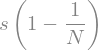

In [10]:
N = sp.symbols('N')
eq1 = sp.Eq(N*x1 + s, N*s)
sol = sp.solve(eq1, x1)[0]
sol = sol.collect(s)
sol

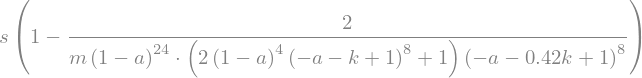

In [11]:
x1k = sol.subs({N: eq.rhs/s})
x1k

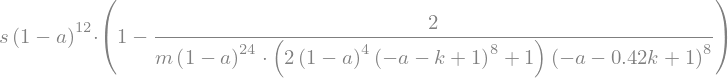

In [12]:
x2k = x21.subs(x1, x1k)
x3k = x31.subs(x1, x1k)
x4k = x41.subs(x1, x1k)
x2k

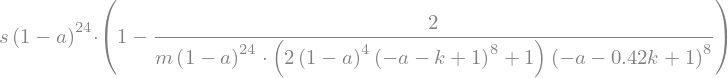

In [13]:
x3k

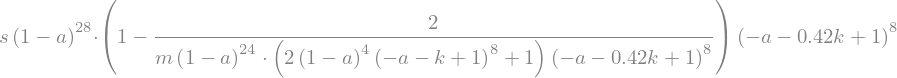

In [14]:
x4k

#### 数值计算

In [15]:
d = 0.8             # 年自然死亡率
c = 1 - d           # 年自然存活率
a = 1 - c**(1/12)   # 月自然死亡率
m = 1.109e5         # 4龄鱼平均产卵量
w = np.array([5.07, 11.55, 17.86, 22.99])
w3, w4 = w[2], w[3]
s = 1.22e11

def calc_n(x3, x4, k):
    k3 = 0.42*k
    n3 = m/2*(1-a-k3)**8*x3
    n4 = m*(1-a-k)**8*x4
    return n3 + n4

def calc_z(x3, x4, k):
    k3 = 0.42*k
    z3 = np.sum([k3*(1-a-k3)**np.arange(8)*x3*w3])
    z4 = np.sum([k*(1-a-k)**np.arange(8)*x4*w4])
    return z3 + z4    

In [16]:
K, X, N, Z = [], [], [], []
for k in np.arange(0, 0.9, 0.001):
    expr = 1-2/(m*(1-a)**24*(2*(1-a)**4*(-a-k+1)**8+1)*(-a-0.42*k+1)**8)
    x1 = s*expr
    x2 = s*(1-a)**12*expr
    x3 = s*(1-a)**24*expr
    x4 = s*(1-a)**28*expr*(-a-0.42*k+1)**8
    K.append(k)
    X.append([x1, x2, x3, x4])
    Z.append(calc_z(x3, x4, k))
    N.append(calc_n(x3, x4, k))

K = np.array(K)
X = np.array(X).T
N = np.array(N)
Z = np.array(Z)

In [17]:
zmax = Z.max()
ind = np.argmax(Z)
kmax = K[ind]
xmax = X[:, ind]
kmax, zmax, xmax

(0.778,
 59414824477.54344,
 array([1.15209589e+11, 2.30419178e+10, 4.60838357e+09, 2.18303580e+07]))

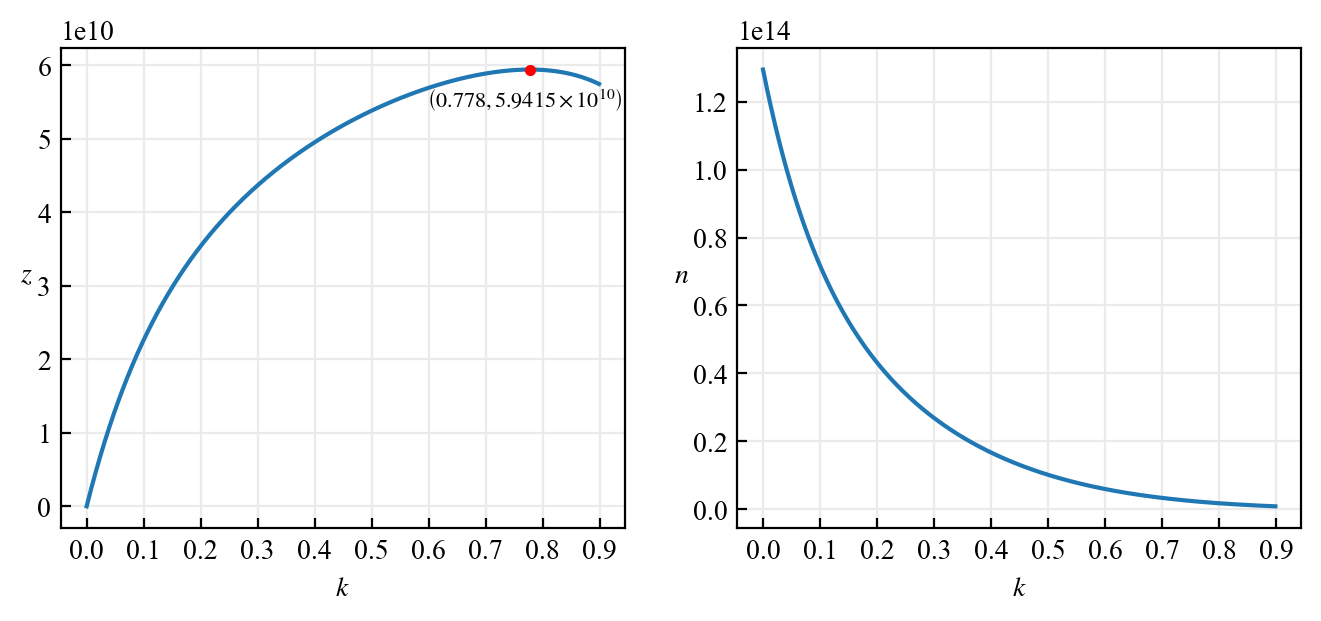

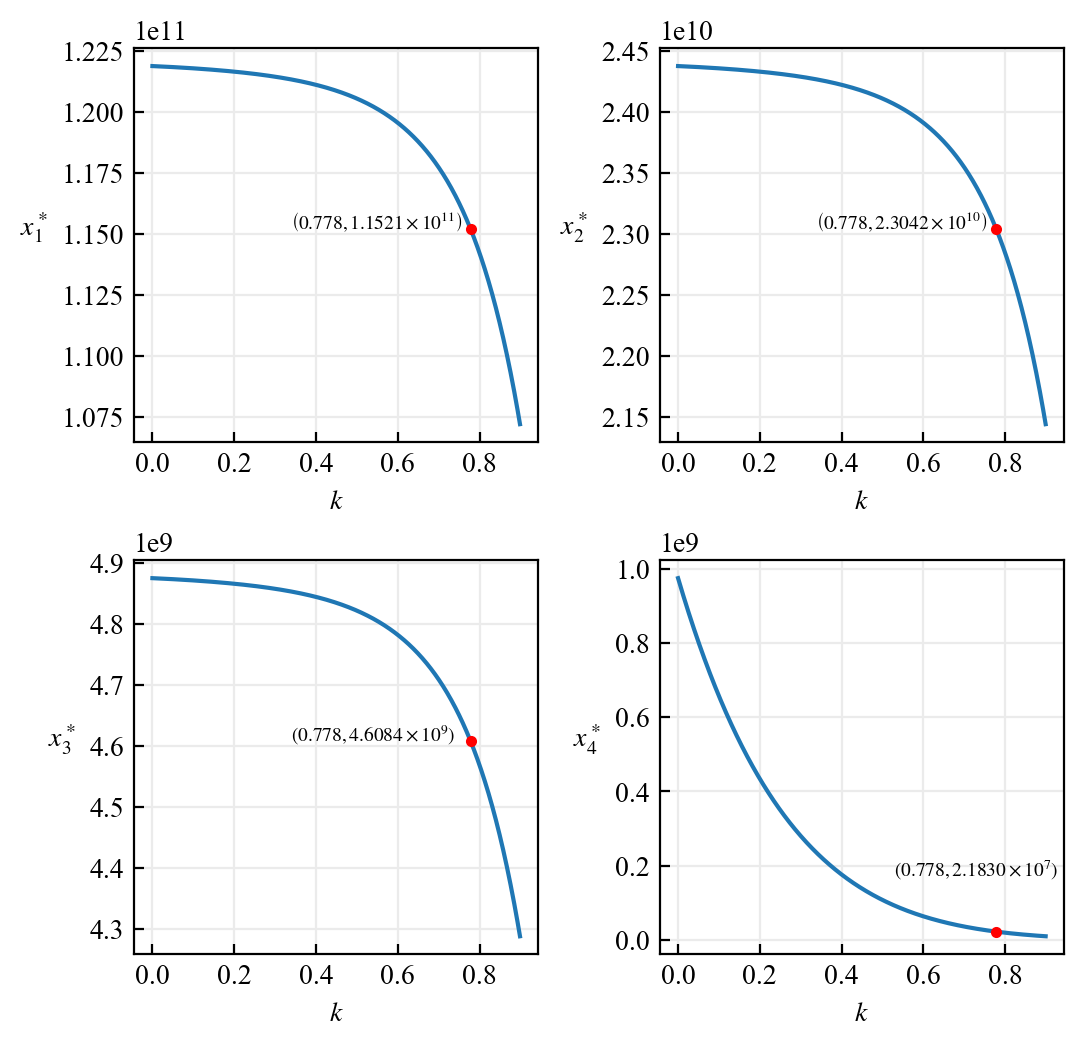

In [18]:
from matplotlib.ticker import MultipleLocator
fig = plt.figure(figsize=(8,7))

def plot1(ax, x, y, ylabel):
    ax.plot(x, y)
    ax.set_xlabel('$k$')
    ax.set_ylabel(ylabel, rotation=0)
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.grid(color='0.92')

axZ = fig.add_subplot(221)
plot1(axZ, K, Z, '$z$')
axZ.scatter(kmax, zmax, marker='.', color='r', zorder=10)
axZ.text(kmax-0.18, zmax-5e9, f'$\\left({kmax:.3f}, {zmax/1e10:.4f}\\times 10^{{10}} \\right)$', fontsize=8)

axN = fig.add_subplot(222)
plot1(axN, K, N, '$n$')

fig.show()

fig1 = plt.figure(figsize=(6,6))
def plot2(ax, x, y, label):
    ax.plot(x, y)
    ax.set_xlabel('$k$', fontsize=10)
    ax.set_ylabel(f'$x_{label}^*$', fontsize=10, rotation=0, labelpad=10)
    ax.xaxis.set_major_locator(MultipleLocator(0.2))
    ax.grid(color='0.92')

ax1 = fig1.add_subplot(221)
plot2(ax1, K, X[0], 1)
ax1.scatter(kmax, xmax[0], marker='.', color='r', zorder=10)
ax1.text(kmax-0.44, xmax[0], f'$\\left({kmax:.3f}, {xmax[0]/1e11:.4f}\\times 10^{{11}} \\right)$', fontsize=7)

ax2 = fig1.add_subplot(222)
plot2(ax2, K, X[1], 2)
ax2.scatter(kmax, xmax[1], marker='.', color='r', zorder=10)
ax2.text(kmax-0.44, xmax[1], f'$\\left({kmax:.3f}, {xmax[1]/1e10:.4f}\\times 10^{{10}} \\right)$', fontsize=7)

ax3 = fig1.add_subplot(223)
plot2(ax3, K, X[2], 3)
ax3.scatter(kmax, xmax[2], marker='.', color='r', zorder=10)
ax3.text(kmax-0.44, xmax[2], f'$\\left({kmax:.3f}, {xmax[2]/1e9:.4f}\\times 10^9 \\right)$', fontsize=7)

ax4 = fig1.add_subplot(224)
plot2(ax4, K, X[3], 4)
ax4.scatter(kmax, xmax[3], marker='.', color='r', zorder=10)
ax4.text(kmax-0.25, xmax[3]+1.5e8, f'$\\left({kmax:.3f}, {xmax[3]/1e7:.4f}\\times 10^7 \\right)$', fontsize=7)

fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig1.show()

> 若取消鱼的寿命为 4 龄这一限定，即假设 4 龄以上的鱼体重不再增长，也不死去，需修改模型，重新计算

In [19]:
a = sp.symbols('a', real=True)      # 月自然死亡率
k = sp.symbols('k', nonneg=True)    # 对4龄鱼的捕捞强度系数
k3 = 0.42*k                         # 对三龄鱼的捕捞强度系数
n = sp.symbols('n', nonneg=True)    # 产卵总量
b = sp.symbols('b', real=True)      # 卵孵化成活率
m = sp.symbols('m', nonneg=True)    # 4龄鱼平均产卵量
m3 = m / 2                          # 3龄鱼平均产卵量
w = sp.symbols('w1:5', nonneg=True) # 平均质量
x1, x2, x3, x4 = sp.symbols('x1:5', positive=True)    # 各龄鱼的数量

In [ ]:
w3, w4 = w[2], w[3]
x21 = (1-a)**12*x1 
x31 = (1-a)**12*x2
z = np.sum([k3*(1-a-k3)**np.arange(8)*x3*w3]) + np.sum([k*(1-a-k)**np.arange(8)*x4*w4])
z = z.simplify()
n = m/2*(1-a-k3)**8*x3 + m*(1-a-k)**8*x4
x11 = b*n
x41 = (1-a-k3)**8*(1-a)**4*x3
x11.simplify()